In [1]:
# Loading The libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [3]:
# Upload data set to colab
from google.colab import files
uploaded = files.upload()

Saving fetal_health.csv to fetal_health.csv


In [4]:
# Loading the data
health_data = pd.read_csv("fetal_health.csv")
print("Displaying the first 7 rows of data...................")
health_data.head(7)

Displaying the first 7 rows of data...................


,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,120.0,0.000,0.0,0.000,0.000,0.0,0.000,73.0,0.5,43.0,...,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,2.0
1,132.0,0.006,0.0,0.006,0.003,0.0,0.000,17.0,2.1,0.0,...,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,1.0
2,133.0,0.003,0.0,0.008,0.003,0.0,0.000,16.0,2.1,0.0,...,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,1.0
3,134.0,0.003,0.0,0.008,0.003,0.0,0.000,16.0,2.4,0.0,...,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,1.0
4,132.0,0.007,0.0,0.008,0.000,0.0,0.000,16.0,2.4,0.0,...,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,1.0
5,134.0,0.001,0.0,0.010,0.009,0.0,0.002,26.0,5.9,0.0,...,50.0,200.0,5.0,3.0,76.0,107.0,107.0,170.0,0.0,3.0
6,134.0,0.001,0.0,0.013,0.008,0.0,0.003,29.0,6.3,0.0,...,50.0,200.0,6.0,3.0,71.0,107.0,106.0,215.0,0.0,3.0


In [7]:
# Initial Data Analysis
print("Displaying structure of data................\n")
health_data.info()
print("\nDisplaying Summary of data................\n")
print(health_data.describe())
print("\nChecking null values in the data................\n")
health_data.isnull().sum()

Displaying structure of data................

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 22 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   baseline value                                          2126 non-null   float64
 1   accelerations                                           2126 non-null   float64
 2   fetal_movement                                          2126 non-null   float64
 3   uterine_contractions                                    2126 non-null   float64
 4   light_decelerations                                     2126 non-null   float64
 5   severe_decelerations                                    2126 non-null   float64
 6   prolongued_decelerations                                2126 non-null   float64
 7   abnormal_short_term_variability                         2126 non-null   float

baseline value                                            0
accelerations                                             0
fetal_movement                                            0
uterine_contractions                                      0
light_decelerations                                       0
severe_decelerations                                      0
prolongued_decelerations                                  0
abnormal_short_term_variability                           0
mean_value_of_short_term_variability                      0
percentage_of_time_with_abnormal_long_term_variability    0
mean_value_of_long_term_variability                       0
histogram_width                                           0
histogram_min                                             0
histogram_max                                             0
histogram_number_of_peaks                                 0
histogram_number_of_zeroes                                0
histogram_mode                          

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


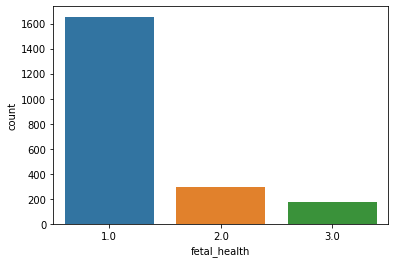

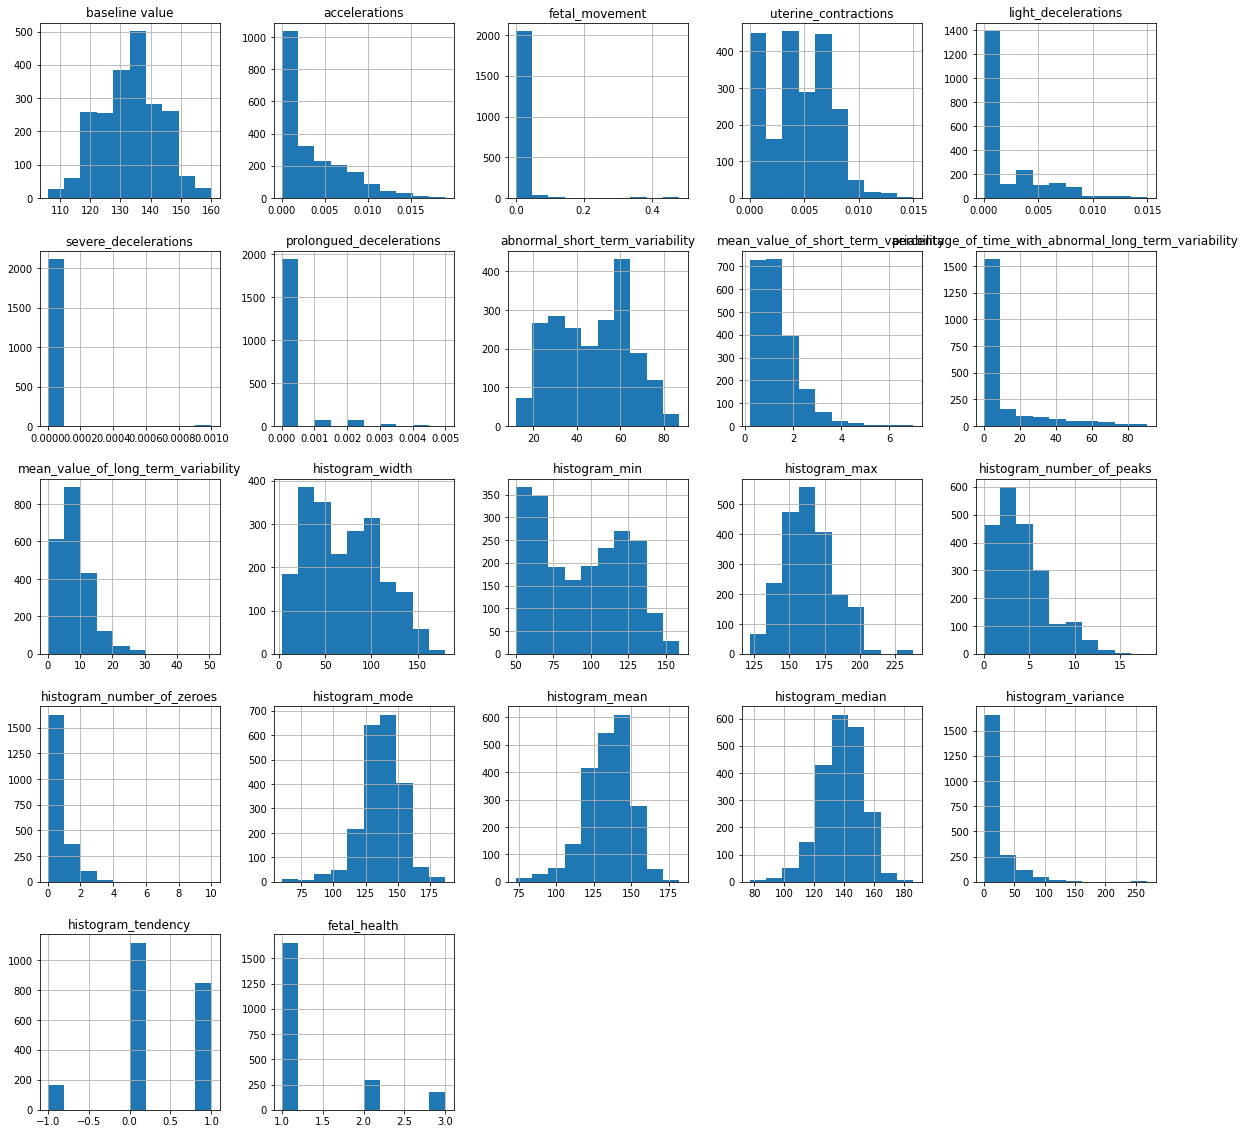

In [8]:
# Data Visualization
sns.countplot(health_data['fetal_health'])
plt.show()
health_data.hist(figsize = (20,20))
plt.show()

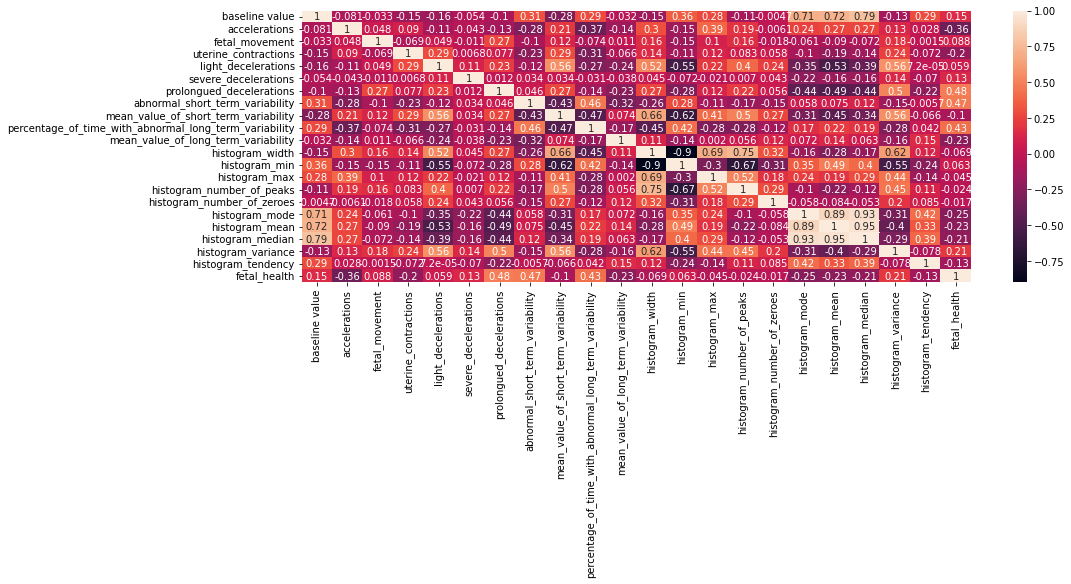

In [9]:
# Correletaion Analysis
plt.figure(figsize=(15, 5))
sns.heatmap(health_data.corr(), annot=True)

In [10]:
# Data Partitioning
X = health_data.drop("fetal_health", axis=1)
y = health_data["fetal_health"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state = 51)

In [11]:
# Scaling the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [18]:
# Model building
model = DecisionTreeClassifier()
model.fit(X_train_scaled, y_train)
predictions = model.predict(X_test_scaled)
kfold_accuracy = cross_val_score(estimator = model, X = X_train_scaled, y = y_train, cv = 10)
print(kfold_accuracy.mean()*100)
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

91.90683962264151
[[385  18   2]
 [ 15  69   2]
 [  0   1  40]]
              precision    recall  f1-score   support

         1.0       0.96      0.95      0.96       405
         2.0       0.78      0.80      0.79        86
         3.0       0.91      0.98      0.94        41

    accuracy                           0.93       532
   macro avg       0.89      0.91      0.90       532
weighted avg       0.93      0.93      0.93       532



In [24]:
# Hyper Parameters tuning
params = {
    'max_depth': [2, 3, 5, 10, 20],
    'min_samples_leaf': [5, 10, 20, 50, 100],
    'criterion': ["gini", "entropy"]
}
grid_search = GridSearchCV(estimator=model, param_grid=params, cv=4, n_jobs=-1, verbose=1, scoring = "accuracy")
grid_search.fit(X_train_scaled, y_train)
print(grid_search.best_params_)
print("\nAccuracy score after parametrs tuning...........................\n")
grid_search.best_score_*100

Fitting 4 folds for each of 50 candidates, totalling 200 fits
{'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 5}

Accuracy score after parametrs tuning...........................



92.03205879019156